# Noise2Void - 3D Example for Flywing Data

In [68]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible
import glob
import pims,sys
sys.path.insert(0,'/home/jmamede/scripts/notebooks/libraries/')
from deco_libraries import  pimsmeta2OMEXML

## Load the Network

In [10]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_Greg'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [31]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')
reader = pims.bioformats.BioformatsReader('/home/jmamede/Data/Greg/example.tif')
reader.bundle_axes = 'cyx'
reader.iter_axis = 't'

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/bioformats.py:408: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


In [28]:
reader.filename.strip('.tif')+'_n2v.ome.tif'

'/home/jmamede/Data/Greg/example_n2v.ome.tif'

Frame([[1329, 2182, 1595, ..., 1552, 1557, 1535],
       [1396, 1673, 1570, ..., 1290, 1464, 1619],
       [1262, 1345, 1677, ..., 1633, 1352, 1707],
       ...,
       [1345, 1804, 1283, ..., 1546, 1531, 1809],
       [1461, 1640, 1203, ..., 1664, 1669, 1688],
       [1682, 1472, 1645, ..., 1794, 1477, 1474]], dtype=uint16)
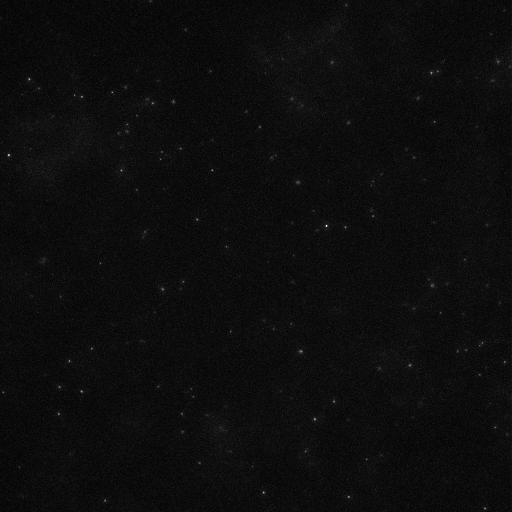

In [43]:
reader[20][0]

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [74]:
# We load the data we want to process.

# img = imread("/home/jmamede/Data/Greg/example/example_c0_t0.tif")

# Here we process the data.
# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
xml = str(reader._metadata.dumpXML())
import tifffile 
import aicsimageio.vendor.omexml as omexmlClass
# b = omexmlClass.OMEXML(a)
# xml = omexmlClass.OMEXML(str(reader._metadata.dumpXML()))
# xml = pimsmeta2OMEXML(reader, project=True,verbose=False)

In [75]:
xml

'<?xml version="1.0" encoding="UTF-8"?><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><Image ID="Image:0" Name="example.tif"><Description/><Pixels BigEndian="true" DimensionOrder="XYCZT" ID="Pixels:0" Interleaved="false" PhysicalSizeX="0.26640005349313073" PhysicalSizeXUnit="µm" PhysicalSizeY="0.26640005349313073" PhysicalSizeYUnit="µm" PhysicalSizeZ="6.0" PhysicalSizeZUnit="µm" SignificantBits="16" SizeC="2" SizeT="300" SizeX="512" SizeY="512" SizeZ="1" TimeIncrement="5.999922752380371" TimeIncrementUnit="s" Type="uint16"><Channel ID="Channel:0:0" SamplesPerPixel="1"><LightPath/></Channel><Channel ID="Channel:0:1" SamplesPerPixel="1"><LightPath/></Channel><MetadataOnly/></Pixels></Image></OME>'

In [83]:


first = True

for ch in range(reader.sizes['c']):
    fname = reader.filename.strip('.tif')+'_c'+str(ch)+'_n2v.tiff'
    tifprj = tifffile .TiffWriter(fname, bigtiff=False,imagej=False)
    for tempo in range(reader.sizes['t']):
#     res = np.zeros(
#                     (reader.sizes['c']
#                      ,reader.sizes['y'],reader.sizes['x'])
#                     , dtype=np.float32)
    
        res = model.predict(reader[tempo][ch], axes='YX', n_tiles=(1,1))
        res[res> 2**16-1] = 2**16-1    
    
    
        tifprj.save(res.astype(np.uint16),
                    compression='ZLIB',
        #                                 compression=9,
        #                         description = xml.to_xml(),
                    photometric='minisblack',
                    #, datetime= True
                    metadata= None,
    #                 contiguous=False,
                    )
    
    tifprj.close()

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.
The input image is of type >u2 and will be casted to float32 for prediction.

In [56]:
res.astype(np.uint16).dtype

dtype('uint16')

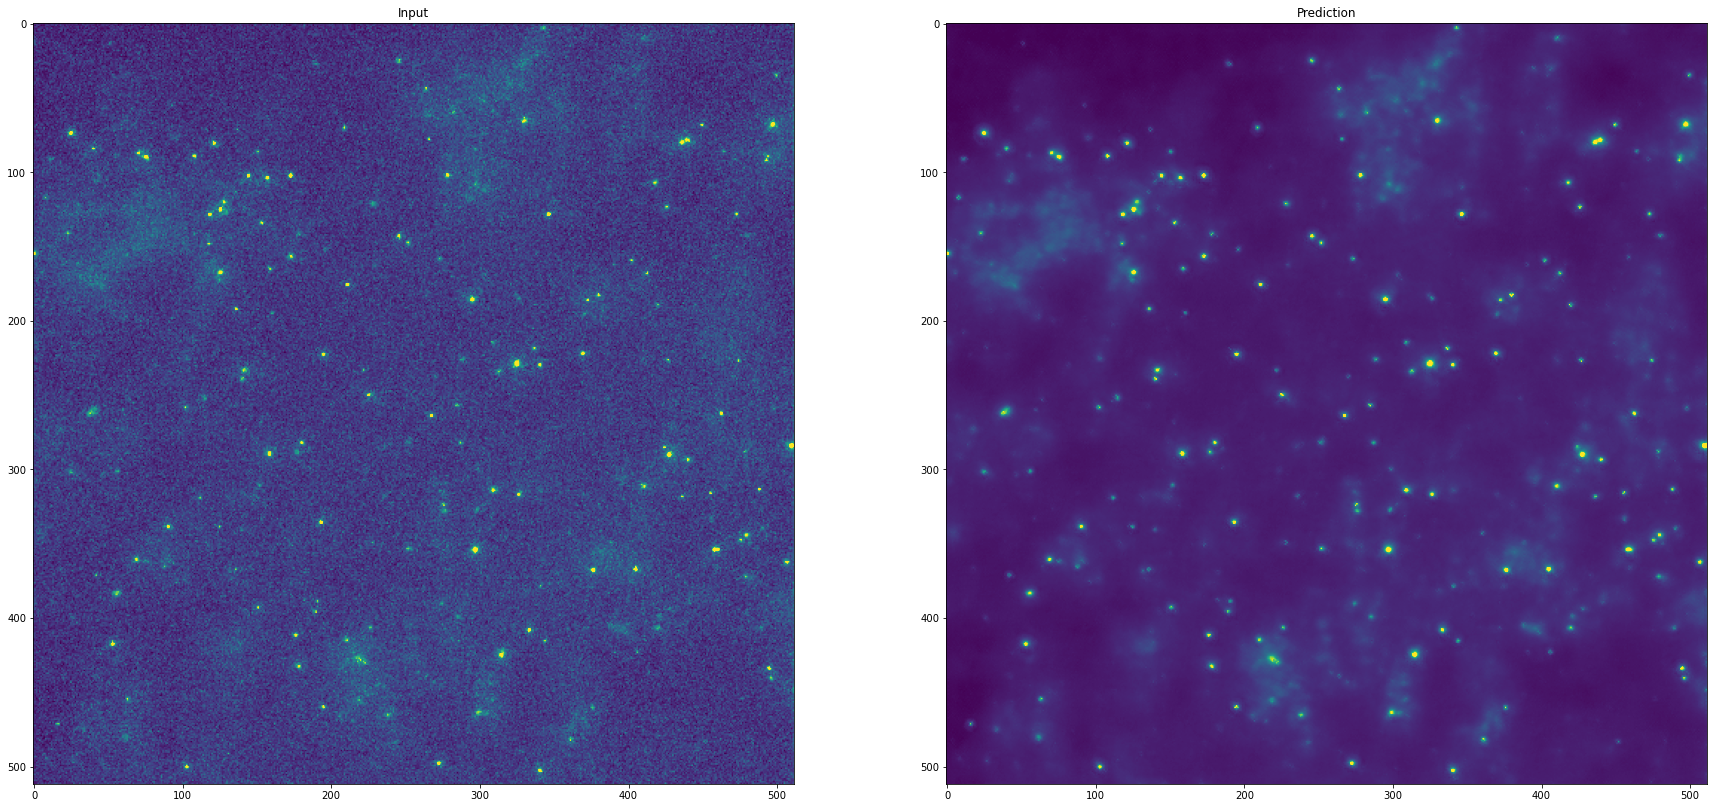

In [7]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(img,
#            cmap='magma',
           vmin=np.percentile(img,0.1),
           vmax=np.percentile(img,99.9)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(pred, 
#            cmap='magma',
           vmin=np.percentile(pred,0.1),
           vmax=np.percentile(pred,99.9)
          )
plt.title('Prediction');

## Save results

In [11]:
save_tiff_imagej_compatible('prediction.tif', pred, 'YX')